## Table of contents

1. [Introduction](#Introduction)

3. [Required libraries](#Required-libraries)

4. [The problem domain](#The-problem-domain)

5. [Step 1: Answering the question](#Step-1:-Answering-the-question)

6. [Step 2: Checking the data](#Step-2:-Checking-the-data)

7. [Step 3: Tidying the data](#Step-3:-Tidying-the-data)

8. [Step 4: Rock Type Analysis](#Step-4:-Rock-Type-Analysis)

11. [Conclusions](#Conclusions)

11. [Acknowledgements](#Acknowledgements)

## Introduction

[[ go back to the top ]](#Table-of-contents)

In this notebook, we will go over a basic Python data analysis pipeline from start to finish to show you what a typical data science workflow looks like for computing the Rock Type from a synthetic well log data. 

## Required libraries

[[ go back to the top ]](#Table-of-contents)

This notebook uses several Python packages that come standard with the Anaconda Python distribution. The primary libraries that we'll be using are:

* **NumPy**: Provides a fast numerical array structure and helper functions.
* **pandas**: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
* **scikit-learn**: The essential Machine Learning package in Python.
* **matplotlib**: Basic plotting library in Python; most other Python plotting libraries are built on top of it.
* **Seaborn**: Advanced statistical plotting library.
* **watermark**: A Jupyter Notebook extension for printing timestamps, version numbers, and hardware information.
* **pandas-profiling**: An open source Python module with which we can quickly do an exploratory data analysis with just a few lines of code.

## The problem domain

[[ go back to the top ]](#Table-of-contents)

For the purposes of this exercise, we will analyze the well log data with the essential measurements acquired by a logging tool. The aim is to carry on Rock type analysis using these input measurements. The data however is not clean and needs to be looked at before jumping into any analysis. <br>

**Note:** The data set we're working with is synthetic and has been modified for demonstration purposes.

## Step 1: Answering the question

[[ go back to the top ]](#Table-of-contents)

The first step to any data analysis project is to define the question or problem we're looking to solve, and to define a measure (or set of measures) for our success at solving that task. The data analysis checklist makes us answer a handful of questions to accomplish that.

>Did you specify the type of data analytic question (e.g. exploration, association causality) before touching the data?

We're trying to classify the rock type based on the log measurements: <br >``'GammaRay(API)', 'ShaleVolume', 'Resistivity', 'Sonic Delta-T', 'Vp(m/s)', 'Vs', 'Density', 'NeutronPorosity', 'DensityPorosity(g/cc)', 'PoissonRatio'.``

>Did you understand the context for the question and the scientific or business application?

We're building part of a data analysis pipeline to automate the process of rock type identification. In the future, this pipeline will be connected to another pipeline that automatically highlights what kind of rock we are drilling through. This can help take important decisions on the drilling parameters to use, mud pressure that needs to be maintained etc.

>Did you record the experimental design?

The well log data is acquired by the logging tool during or after drilling the well. Different tools provide different measurements which behave differently depending on the nature of the rock being drilled. Analysis of the well logs together gives us the information about what kind of a rock we would be drilling. Machine Learning approach can automate the process of identification of rock.

>Did you consider whether the question could be answered with the available data?

The dataset we have is a 330m well section and would contain rock types specific to the interval under consideration. Once these rock types are identified based on the input measurements, same model can be applied on another section to identify any overlap or similar rock types. 

<hr />

Notice that we've spent a fair amount of time working on the problem without writing a line of code or even looking at the data.

**Thinking about and documenting the problem we're working on is an important step to performing effective data analysis that often goes overlooked.** 

## Step 2: Checking the data

[[ go back to the top ]](#Table-of-contents)

The next step is to look at the data we're working with. Even curated data sets from the government can have errors in them, and it's vital that we spot these errors before investing too much time in our analysis.

Generally, we're looking to answer the following questions:

* Is there anything wrong with the data?
* Are there any quirks with the data?
* Do I need to fix or remove any of the data?

Let's start by reading the data into a pandas DataFrame.

In [1]:
# Load required packages 
import numpy as np
import pandas as pd

# ML Libraries
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.impute import KNNImputer

# Plotting Libraries 
%matplotlib nbagg
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

# Data Analysis libraries
from pandas_profiling import ProfileReport

In [2]:
# Load the dataset 

well_log = pd.read_csv('dataset/well_log_data.csv', header = 0 )
well_log.head()

GammaRay(API)  ShaleVolume  Resistivity   Sonic    Vp(m/s)    Vs(m/s)  \
0         73.215       0.7965         0.25  137.81  7256.3675  2799.0030   
1         69.152       0.7391         0.20  138.06  7243.2276  2804.5841   
2         65.965       0.6940         0.21  138.06  7243.2276  2817.0360   
3         68.215       0.7258         0.27  137.31  7282.7908  2839.0723   
4         70.840       0.7630         0.36  136.31  7336.2189  2870.3577   

   Density  NeutronPorosity  DensityPorosity(g/cc)  PoissonRatio  Depth(m)  
0   2.1278          -999.25                 0.2818        0.4126      2007  
1   2.1202          -999.25                 0.2893        0.4118      2008  
2   2.1149          -999.25                 0.2946        0.4109      2009  
3   2.1217          -999.25                 0.2889        0.4104      2010  
4   2.1301          -999.25                 0.2819        0.4096      2011

The data seems to be in a usable format. There are 11 columns available to us.

The first row in the data file defines the column headers, and the headers are descriptive enough for us to understand what each column represents. Some of the headers even give us the units that the measurements were recorded in, just in case we needed to know at a later point in the project.


**One of the first things we should do is to look at each of the measurement and see if there are any missing values, outliers or data type mismatches.** 

To conduct this quick analysis we will use the open source library **'pandas-profiling'** which can quickly do an exploratory data analysis with just a few lines of code.
We will generate a pandas profile and output a report in the notebook for further analysis.

In [3]:
# Create a pandas profile 

profile = ProfileReport(well_log, title="Pandas Profiling Report")
profile.to_notebook_iframe()

## Data Overview 

Important findings from the overview <br>

Data Statistics: <br>
1. There are 11 variables/measurements and 331 observations/depth values 
2. There are 10 cells which contain missing values 
<br>

Variable Types: <br>

1. There are 10 Numerical and 1 Categorical variable

Warnings: <br>
1. Neutron Posority has all constant values of -999.25, this doesnt look okay as the formation cannot have constant neutron porosity value of -999.25. This column was being considered a Categorical variable because of just one constant value.
2. Gamma Ray has 10 missing entries, we need to find and fill those missing entries. 
3. Density has 5 Zero entries which is suspicious as the density cannot be zero.

Let us look at the other items to see if there are any other data issues.


## Variables 

There is a lot of information about each of the variable in the Variables section but we are trying to identify any data related issues which we need to correct before we move forward with the analysis.

You can verify the findings we had in the Data overview section by looking at the distributions of each of the variables. Additional observations not covered in the Data Overview section are: <br>
1. The depth seems to show some values close to 6000m as seen in the distribution whereas all the other depth values are close to 2000m. It is not possible for the depth to change from 2000 to 6000 m for short period of time in the 330 m well section. This most likely is bad entry or an outlier. <br>
2. Neutron porosity which we noticed above contains a constant value of -999.25 has been rejected as a bad entry by the algorithm already.

Feel free to look and interpret **Interactions** section to see scatter plots between different measurements. <br>
We will concentrate on the **Correlations** section to look at dependencies between the variables.

## Correlations 

There are multiple correlation coefficients that you can check. For instance the widely known pearson correlation coefficient provides the linear correlation coefficient but in case you believe the variables are not linearly associated you may check spearman correlation coefficient which captures non linear monotonic correlations quite well.
For now we are only looking at the pearson correlation coefficient. <br>
1. Gamma Ray and Shale Volume show a strong positive correlation which could be the case as one of the inputs for the shale volume computation is Gamma Ray and  also shale formations in general have higher Gamma Ray counts. <br>
2. There is a negative correlation between resistivity and density porosity and a positive correlation between sonic and density porosity.

## Step 3: Tidying the data

[[ go back to the top ]](#Table-of-contents)

The exploratory data analysis carried out above indicates the need to do some data cleaning before we proceed. Below are the steps for data cleaning for each of the variable.

## Impute Missing Values 

Missing values in the column **Gamma Ray** column:

In [4]:
well_log[well_log['GammaRay(API)'].isnull()]

GammaRay(API)  ShaleVolume  Resistivity   Sonic    Vp(m/s)    Vs(m/s)  \
301            NaN       0.7965         0.25  137.81  7256.3675  2799.0030   
302            NaN       0.7391         0.20  138.06  7243.2276  2804.5841   
303            NaN       0.6940         0.21  138.06  7243.2276  2817.0360   
304            NaN       0.7258         0.27  137.31  7282.7908  2839.0723   
305            NaN       0.7630         0.36  136.31  7336.2189  2870.3577   
306            NaN       0.6415         0.52  134.31  7445.4620  2989.7909   
307            NaN       0.6327         0.70  127.78  7825.9509  3290.0682   
308            NaN       0.6384         0.79  125.78  7950.3896  3385.7098   
309            NaN       0.5932         0.72  126.28  7918.9104  3374.7286   
310            NaN       0.6428         0.61  123.78  8078.8496  3484.8607   

     Density  NeutronPorosity  DensityPorosity(g/cc)  PoissonRatio  Depth(m)  
301   2.1278          -999.25                 0.2818        0.4126      2308  
302   2.1202          -999.25                 0.2893        0.4118      2309  
303   2.1149          -999.25                 0.2946        0.4109      2310  
304   2.1217          -999.25                 0.2889        0.4104      2311  
305   2.1301          -999.25                 0.2819        0.4096      2312  
306   2.1242          -999.25                 0.2911        0.4039      6313  
307   2.1513          -999.25                 0.2744        0.3927      6314  
308   2.1609          -999.25                 0.2681        0.3892      2315  
309   2.1533          -999.25                 0.2750        0.3890      2316  
310   2.1706          -999.25                 0.2618        0.3857      2317

It's not ideal that we had to drop those rows, especially considering they're all sequential as far as the depth of the well is concerned. Since it seems like the missing data is systematic — all of the missing values are in the same column this error could potentially bias our analysis.

Most frequently used approaches to handle the missing data are: <br>
1. Do nothing
2. Drop entire row 
3. Fill with the mean or median  value of the measurement for entire well section
4. Fill with the previous or the next value to missing entry 
4. Interpolate between the neighbouring values(value just before and after the missing entry) 
5. Impute using k-NN 

Depending on the used case you can decide which approach works the best. In this case we will use the k-NN approach to fill the values. In the k-NN approach the other available meaurements (Shale Volume, Resistivity, Sonic) will be used to determine the likely values of Gamma Ray in the missing interval. <br>
Ref: [Nearest Neighbors Imputation](https://scikit-learn.org/stable/modules/impute.html#nearest-neighbors-imputation)

In [5]:
# k-NN to determine the missing Gamma Ray values 

nan = np.nan
X = np.array(well_log.loc[:, ['GammaRay(API)','ShaleVolume','Resistivity','Sonic']])
imputer = KNNImputer(n_neighbors=2, weights="uniform")
well_log['GammaRay_Imputed'] = imputer.fit_transform(X)[:,0]

In [6]:
# Compare the missing Gamma Ray values 

well_log.loc[297:312, ['GammaRay(API)','GammaRay_Imputed']]

GammaRay(API)  GammaRay_Imputed
297         61.012           61.0120
298         40.105           40.1050
299         28.286           28.2860
300         38.855           38.8550
301            NaN           70.9960
302            NaN           67.5585
303            NaN           67.5585
304            NaN           67.5275
305            NaN           71.0900
306            NaN           61.9960
307            NaN           61.6680
308            NaN           61.0115
309            NaN           63.1910
310            NaN           64.3160
311         53.918           53.9180
312         53.793           53.7930

## Outliers or Incorrect values 

**Density** column has some zero entries and the **Depth** also seems to have some outlier values.

### 1. Density 

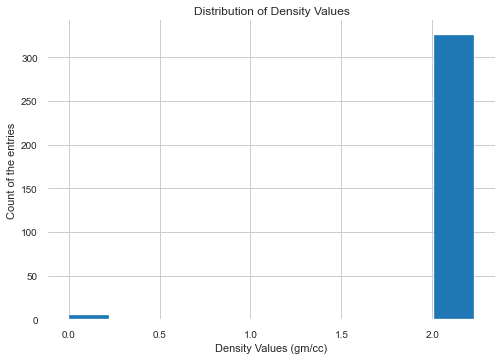

In [7]:
# Plot the Histogram to confirm zero density values 

well_log.Density.hist()
plt.title('Distribution of Density Values')
plt.xlabel('Density Values (gm/cc)')
plt.ylabel('Count of the entries')
plt.show()

There are density values around 0. We can locate them and replace with neighbouring values.

In [8]:
well_log[well_log.Density ==0]

GammaRay(API)  ShaleVolume  Resistivity   Sonic    Vp(m/s)    Vs(m/s)  \
321         45.543       0.4036         0.37  132.31  7558.0077  3147.3555   
322         47.480       0.4310         0.44  127.28  7856.6939  3375.0354   
323         56.512       0.5594         0.55  119.03  8401.2434  3763.5865   
324         59.824       0.6065         0.68  116.03  8618.4607  3918.7153   
325         58.105       0.5820         0.65  118.03  8472.4223  3812.1862   

     Density  NeutronPorosity  DensityPorosity(g/cc)  PoissonRatio  Depth(m)  \
321      0.0          -999.25                 0.3137        0.3951      2328   
322      0.0          -999.25                 0.2971        0.3869      2329   
323      0.0          -999.25                 0.2579        0.3745      2330   
324      0.0          -999.25                 0.2428        0.3697      2331   
325      0.0          -999.25                 0.2521        0.3731      2332   

     GammaRay_Imputed  
321            45.543  
322            47.480  
323            56.512  
324            59.824  
325            58.105

Since there are very few entries which are zero. We can just replace the 0 density value with the last non zero density. In the below code snippet, method = 'ffill' replaces the 0 values with the last non zero density value.

In [9]:
well_log.Density.replace(0, method = 'ffill', inplace = True )

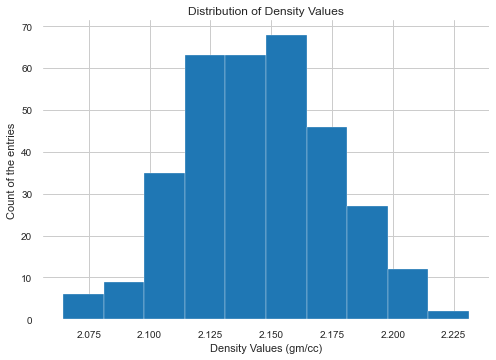

In [10]:
# Plot the Histogram to confirm zero density values 
well_log.Density.hist()
plt.title('Distribution of Density Values')
plt.xlabel('Density Values (gm/cc)')
plt.ylabel('Count of the entries')
plt.show()

Density Values look reasonable now.

### 2. Depth 

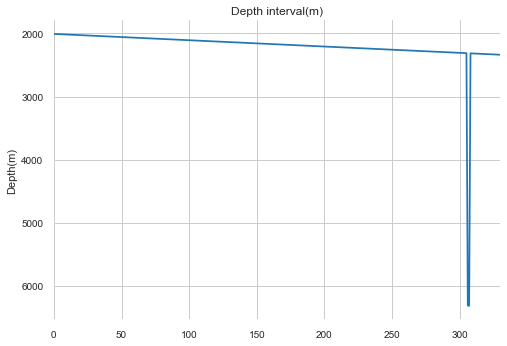

In [11]:
# Plot the Histogram to confirm outliers in depth values 

well_log['Depth(m)'].plot()
plt.title('Depth interval(m)')
plt.ylabel('Depth(m)')
plt.gca().invert_yaxis()
plt.grid()
plt.show()

The depth value in the well section shows a sudden jump to 6000m+ (outlier) which does not seem to be right. It could be an error in recording data. We need to smoothen it out and remove these outlier values.

In [12]:
# 1. Identify the outlier values 
# 2. Assign NaN values to these outliers
# 3. Interpolate(linear) based on the surrounding depth values

well_log.loc[ well_log['Depth(m)']>6000,'Depth(m)' ] = np.nan
transformed_depth = well_log['Depth(m)'].interpolate(method = 'linear')
well_log['Depth(m)_imputed'] = transformed_depth

In [13]:
well_log.loc[300:310, ['Depth(m)','Depth(m)_imputed']]

Depth(m)  Depth(m)_imputed
300    2307.0            2307.0
301    2308.0            2308.0
302    2309.0            2309.0
303    2310.0            2310.0
304    2311.0            2311.0
305    2312.0            2312.0
306       NaN            2313.0
307       NaN            2314.0
308    2315.0            2315.0
309    2316.0            2316.0
310    2317.0            2317.0

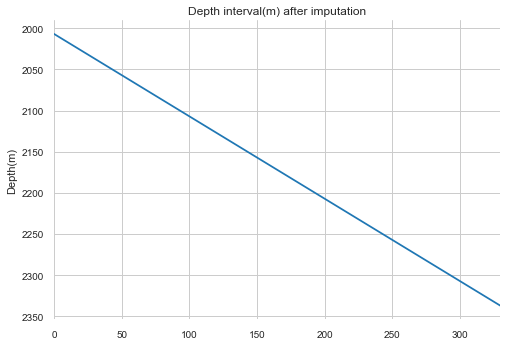

In [14]:
# Imputed Depth values 

well_log['Depth(m)_imputed'].plot()
plt.title('Depth interval(m) after imputation')
plt.ylabel('Depth(m)')
plt.gca().invert_yaxis()
plt.grid()
plt.show()

Now the depth seems to be okay. The well section is between 2300 and 2350 m depth interval.

## Remove redundant columns 

Since the Neutron Porosity is constant value -999.25 through out, it seems to be redundant and can be removed from the analysis. Also going forward we can use the imputed Gamma Ray and Depth values hence we do not need th original columns. 


In [15]:
well_log.drop(columns = ['GammaRay(API)', 'NeutronPorosity','Depth(m)'], inplace = True)

Now that the data is in a clean form, we can proceed with the Rock Typing.

## Step 4: Rock Type Analysis

[[ go back to the top ]](#Table-of-contents)

In [16]:
well_log.head()

ShaleVolume  Resistivity   Sonic    Vp(m/s)    Vs(m/s)  Density  \
0       0.7965         0.25  137.81  7256.3675  2799.0030   2.1278   
1       0.7391         0.20  138.06  7243.2276  2804.5841   2.1202   
2       0.6940         0.21  138.06  7243.2276  2817.0360   2.1149   
3       0.7258         0.27  137.31  7282.7908  2839.0723   2.1217   
4       0.7630         0.36  136.31  7336.2189  2870.3577   2.1301   

   DensityPorosity(g/cc)  PoissonRatio  GammaRay_Imputed  Depth(m)_imputed  
0                 0.2818        0.4126            73.215            2007.0  
1                 0.2893        0.4118            69.152            2008.0  
2                 0.2946        0.4109            65.965            2009.0  
3                 0.2889        0.4104            68.215            2010.0  
4                 0.2819        0.4096            70.840            2011.0

For rock typing we can use any unsupervised clustering technique. **k-means** is the most widely used clustering technique which samples the dataset into k groups/clusters of equal variance by minimizing the criteria called **Inertia** or **within-cluster-sum-of-squares**.  <br>
Refer: [sklearn-k-means-Clustering](https://scikit-learn.org/stable/modules/clustering.html#k-means) <br>

Prior to implementation of k-means, the data needs to be normalized as otherwise the clusters tend to separate along the variables with higher variance. <br>
Refer: [feature_scaling_k-means](https://stats.stackexchange.com/questions/21222/are-mean-normalization-and-feature-scaling-needed-for-k-means-clustering)


In [17]:
# Preprocessing the dataset 

logs_tmp = well_log.values  
min_max_scaler = preprocessing.StandardScaler()
x_scaled = min_max_scaler.fit_transform(logs_tmp)
well_logs_scaled = pd.DataFrame(x_scaled)

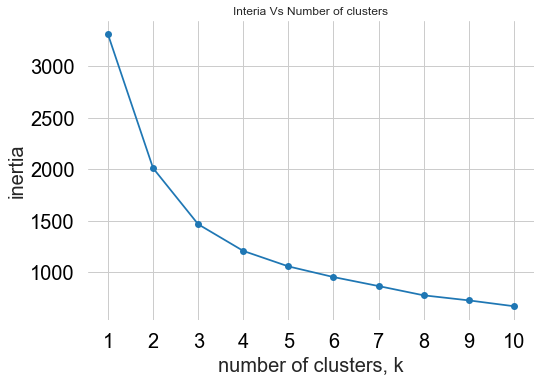

In [18]:
inertias = []
clusters_list = range(1,11)

# Compute Inertia value for different number of cluster
for num_clusters in clusters_list:
    # Create a KMeans instance with k clusters: model
    model=KMeans(n_clusters=num_clusters , random_state=123)
    
    # Fit model to samples
    model.fit(well_logs_scaled)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

# Plot the Inertia Vs Number of Clusters 
plt.plot(clusters_list, inertias, marker = 'o')

plt.xlabel('number of clusters, k', size=20)
plt.ylabel('inertia', size=20)
plt.xticks(clusters_list)
plt.title('Interia Vs Number of clusters')
plt.tick_params(direction='out', length=6, width=2, colors='k')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid( zorder=1)
plt.show()

The **Elbow method** is used to choose the appropriate number of clusters. The target is to define the number of clusters such that the total intra cluster variation [or **Inertia:** total within-cluster sum of square (WSS)]  is minimized that shows that the points within a cluster are similar to each other.

The Elbow method looks at the total WSS as a function of the number of clusters: One should choose a number of clusters so that adding another cluster doesn’t improve much better the total WSS. In our case the maximum drop in the Inertia happens up to 3 clusters. After 3 the inertia drop is not very significant. We have sufficient evidence to go with k = 3.

Let us now implement the k-means with 3 clusters and predict the 3 Rock types for the well section. 



In [19]:
# k-means implementation with 3 clusters

kmeans = KMeans(n_clusters=3)
kmeans.fit(well_logs_scaled)

labels_rocks = kmeans.predict(well_logs_scaled)
rocktypes = pd.DataFrame({'RockType':labels_rocks})
well_log['rock_types'] = rocktypes.RockType

In [20]:
well_logs_scaled_embedded = TSNE(n_components=2, learning_rate=200,random_state=10, 
                                 perplexity=50).fit_transform(well_logs_scaled)

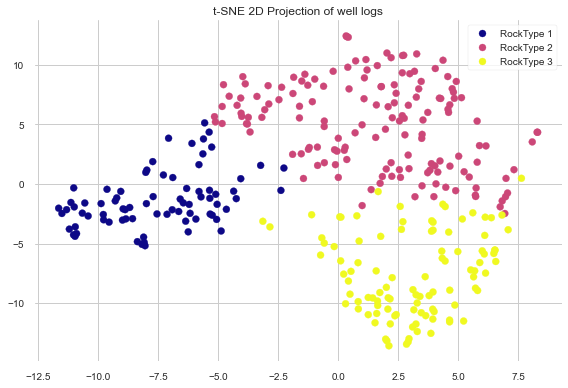

In [21]:
# Projecting the well log features into 2d projection using t-SNE

classes = ['RockType 1','RockType 2','RockType 3']
scatter = plt.scatter(well_logs_scaled_embedded[:,0],
            well_logs_scaled_embedded[:,1], 
            c =  rocktypes['RockType'], cmap = 'plasma' )
plt.title('t-SNE 2D Projection of well logs')
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.grid()
plt.tight_layout()
#plt.show()

The 3 rock types identified can be seen pretty well on the 2D projection

### Plot well logs

In [22]:
# Display the well logs 

def well_log_display(top_depth,bottom_depth, df, list_columns):
    
    logs=df[(df['Depth(m)_imputed'] >= top_depth) & (df['Depth(m)_imputed'] <= bottom_depth)]
    fig, ax = plt.subplots(nrows=1, ncols=len(list_columns), figsize=(15,20),  sharey=True)
    fig.subplots_adjust(top=0.75,wspace=0.1)

    for axes in ax:
        axes.set_ylim (top_depth,bottom_depth)
        axes.yaxis.grid(True)
        axes.get_xaxis().set_visible(False) 
        
    for i in range(len(list_columns)):
        if (list_columns[i] == 'rock_types'):
            ax1=ax[i].twiny()
            label = logs.rock_types
            tagged_depths = logs['Depth(m)_imputed']
            rock_type_depth(ax1,tagged_depths, label)
            ax1.set_xlabel(list_columns[i],color= list(colors.keys())[i], fontsize=15)    
            ax1.minorticks_off()
            ax1.grid(False)
            
        elif (list_columns[i] == 'Resistivity'):
            ax1=ax[i].twiny()
            ax1.set_xlim(0.1,10)
            ax1.set_xscale('log')
            ax1.grid(True)
            ax1.plot(logs[list_columns[i]], logs['Depth(m)_imputed'], label=list_columns[i], color=list(colors.keys())[i]) 
            ax1.spines['top'].set_position(('outward',40))
            ax1.set_xlabel(list_columns[i],color= list(colors.keys())[i], fontsize=10)    
            ax1.tick_params(axis='x', colors=list(colors.keys())[i],labelsize = 10)
        
        else:
            ax1=ax[i].twiny()
            ax1.grid(True)
            ax1.plot(logs[list_columns[i]], logs['Depth(m)_imputed'], label=list_columns[i], color=list(colors.keys())[i]) 
            ax1.spines['top'].set_position(('outward',40))
            ax1.set_xlabel(list_columns[i],color= list(colors.keys())[i], fontsize=10)    
            ax1.tick_params(axis='x', colors=list(colors.keys())[i],labelsize = 10)

In [23]:
# Display the rock type track 

def rock_type_depth (ax, depth, label):
    patches = []
    for i in range(len(well_log)):
        poly=Rectangle((0,depth[i]), 4, 1)
        patches.append(poly)

    p = PatchCollection(patches, match_original=False,alpha=0.6)

    colors = 1000*np.array(well_log.rock_types)
    p.set_array(np.array(colors))
    ax.add_collection(p)
    ax.invert_yaxis()
    x_pos_label=['', '','','']
    ax.set_xticklabels(x_pos_label, rotation = 0)
    ax.get_xaxis().set_visible(True)

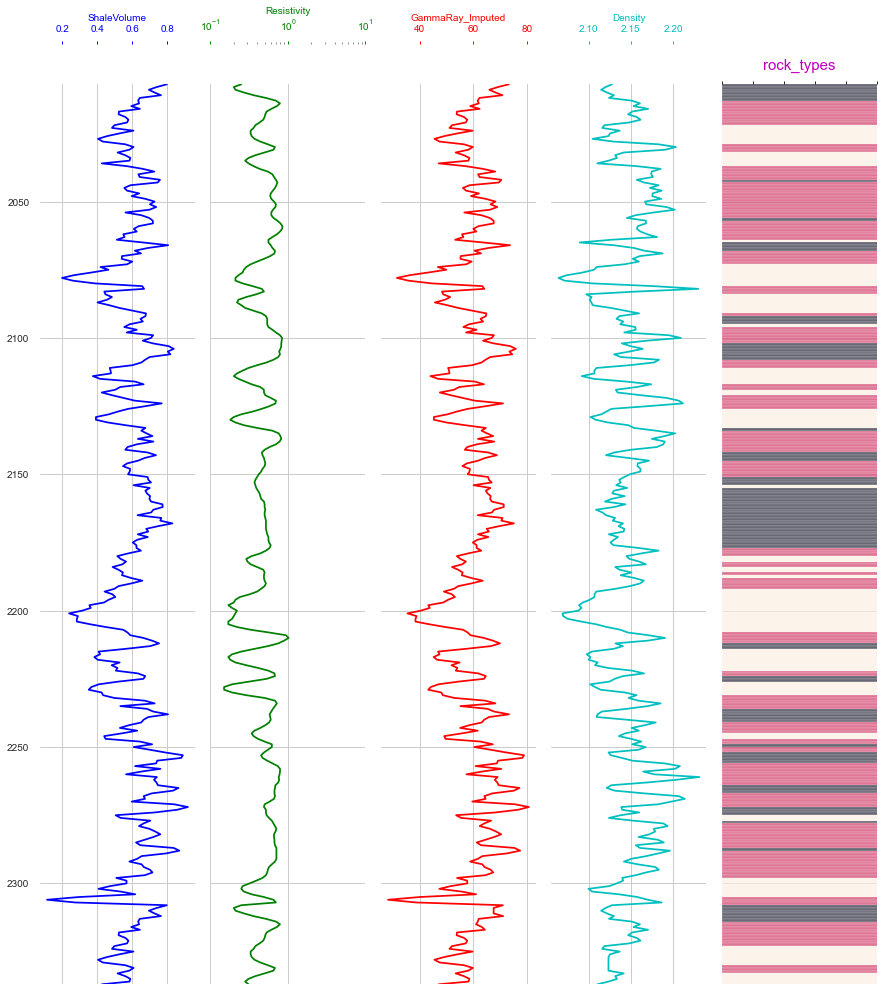

In [24]:
# Display the combined plot for 'ShaleVolume', 'Resistivity', 'GammaRay_Imputed','Density', 'rock_types'

list_columns = ['ShaleVolume', 'Resistivity', 'GammaRay_Imputed','Density', 'rock_types']
well_log_display(well_log['Depth(m)_imputed'].min(),well_log['Depth(m)_imputed'].max(), well_log, list_columns)

Each colour corresponds to a particular rock type identified by the unsupervised machine learning algorithm. 

## Conclusions

[[ go back to the top ]](#Table-of-contents)

We have completed the Machine learning pipeline to demo rock type analysis starting from Exploratory Data Analysis to Rock type identification using unsupervised machine learning.

We hope you will feel more confident now to replicate your understanding to other similar used cases. <br>
For any questions please get intouch with the Digital Hub team at **support@digitalhub.io**

## Acknowledgements

[[ go back to the top ]](#Table-of-contents)

1. **pandas-profiling** - Generates profile reports from a pandas DataFrame<br> [LICENSE](https://github.com/pandas-profiling/pandas-profiling/blob/master/LICENSE)